####  #허주성  #Python_for_data_analysis #Chapter2

# Chapter 02 사례소개

##2.1 Bit.ly의 1.usa.gov 데이터

- 교수님 자료 참고해 txt파일 가져오기. ( url 접근 및 urllib2 모듈 사용)

In [51]:
pathUrl = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [52]:
import urllib2
response = urllib2.urlopen(pathUrl)
responseLines = response.readlines()
#교재 open(path).readline()과 같음. response는 type이 instance. 

In [53]:
import json
records=[json.loads(line) for line in responseLines]  #리스트 내포 !! 포문과 리스트를 한번에 해결.

In [54]:
responseLines[0]

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [55]:
print records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]}


In [8]:
records[0]['tz'] #출력 형식이 아닌 단순한 객체 표현

u'America/New_York'

In [9]:
print records[0]['tz'] # 출력 형식에 맞는 출력

America/New_York


----------------------------------------------------------------------------------------

##2.1.1 순수 파이썬으로 표준시간대 세어보기

In [10]:
time_zones=[rec['tz'] for rec in records]  # records 안의 모든 값이 tz (표준시간)이 아니기 떄문에 에러

KeyError: 'tz'

In [11]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]  #if 문을 추가한 리스트 내포
time_zones[:10] #[:] range, 범위를 나타냄 0에서 10까지 출력.

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
print time_zones[2:8]

[u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'']


In [13]:
print time_zones[:3440]  #데이터가 많다..

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'', u'America/Los_Angeles', u'America/New_York', u'America/New_York', u'America/New_York', u'Asia/Hong_Kong', u'Asia/Hong_Kong', u'America/New_York', u'America/Denver', u'Europe/Rome', u'Africa/Ceuta', u'America/New_York', u'America/New_York', u'America/New_York', u'Europe/Madrid', u'Asia/Kuala_Lumpur', u'Asia/Nicosia', u'America/Sao_Paulo', u'', u'', u'Europe/London', u'America/New_York', u'Pacific/Honolulu', u'America/Chicago', u'', u'', u'Pacific/Honolulu', u'', u'America/New_York', u'America/New_York', u'America/New_York', u'America/Chicago', u'Europe/Rome', u'America/New_York', u'America/New_York', u'America/Los_Angeles', u'', u'', u'America/New_York', u'America/New_York', u'Europe/Malta', u'America/New_York', u'America/New_York', u'', u'America/Los_Angeles', u'America/Sao_Paulo', u'', u'Asia/Hong_Kong', u'Asia/Hong_Kong', u'Pac

- 표준시간대 갯수 파악

In [14]:
def get_counts(sequence):       #파이썬은 들여쓰기가 매우 중요 특별한 괄호처리가 없기때문에 ! 
    counts={}                   # def로 함수 정의
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [15]:
from collections import defaultdict     #collections의 defaultdict 라이브러리를 사용한다.
def get_counts2(sequence):
    counts=defaultdict(int)   # 0으로 초기화
    for x in sequence:
        counts[x] += 1
    return counts

In [16]:
counts = get_counts(time_zones)

In [17]:
counts['America/New_York']

1251

In [18]:
counts = get_counts2(time_zones)
counts['America/New_York']

1251

In [19]:
len(time_zones)

3440

- 상위 10개 표준시간대 구하기

In [20]:
def top_counts(count_dict,n=10):        
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [21]:
top_counts(counts) #일반 sort

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [22]:
def top_counts2(count_dict,n=10):        
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[-n:]

In [23]:
top_counts2(counts) # 역순 sort

[(1, u'America/Lima'),
 (1, u'America/La_Paz'),
 (1, u'America/Costa_Rica'),
 (1, u'America/Caracas'),
 (1, u'America/Argentina/Mendoza'),
 (1, u'America/Argentina/Cordoba'),
 (1, u'America/Argentina/Buenos_Aires'),
 (1, u'Africa/Lusaka'),
 (1, u'Africa/Johannesburg'),
 (1, u'Africa/Casablanca')]

In [24]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

## 2.1.2 pandas로 표준시간대 세어보기

In [56]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [26]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [27]:
tz_counts = frame['tz'].value_counts()   #.value_count() 기본 메소드
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [29]:
clean_tz=frame['tz'].fillna('Missing')       # 비어있는 값을 Unknown 으로 바꾸기 위한 작업.
clean_tz[clean_tz==''] = 'Unknown'
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [35]:
tz_counts[:10].plot(kind='barh',rot=0)

In [39]:
%matplotlib inline    # 그래프가 보이지 않아서 추가.

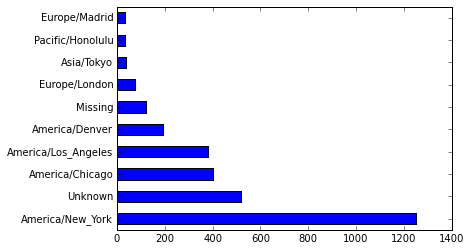

In [40]:
tz_counts[:10].plot(kind='barh',rot=0)

In [36]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [37]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [38]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [42]:
results=Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [43]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [44]:
cframe=frame[frame.a.notnull()]

In [48]:
operating_system=np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
print operating_system[:5]
#window 문자열을 포함하면 window, 없으면 Not Window 출력

['Windows' 'Not Windows' 'Windows' 'Not Windows' 'Windows']


In [49]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [50]:
by_tz_os = cframe.groupby(['tz',operating_system]) #grouping Data -> tz & opersys

In [52]:
agg_counts=by_tz_os.size().unstack().fillna(0)
print agg_counts[:10]

                                Not Windows  Windows
tz                                                  
                                        245      276
Africa/Cairo                              0        3
Africa/Casablanca                         0        1
Africa/Ceuta                              0        2
Africa/Johannesburg                       0        1
Africa/Lusaka                             0        1
America/Anchorage                         4        1
America/Argentina/Buenos_Aires            1        0
America/Argentina/Cordoba                 0        1
America/Argentina/Mendoza                 0        1


In [53]:
indexer = agg_counts.sum(1).argsort() #오름차순 정렬
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [54]:
count_subset=agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


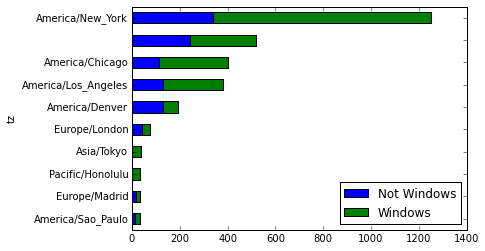

In [55]:
count_subset.plot(kind='barh',stacked=True)

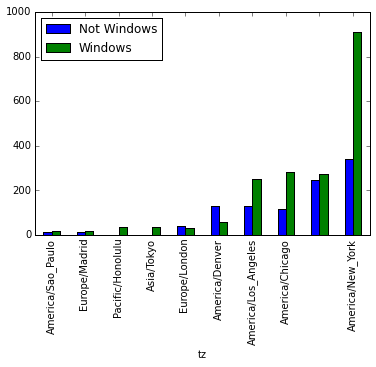

In [58]:
count_subset.plot(kind='bar',stacked=False)

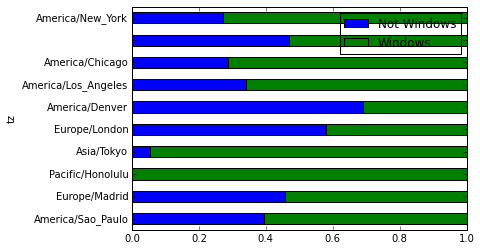

In [60]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)

## 2.2 MovieLens의 영화 평점 데이터

In [57]:
import pandas as pd             #교재에 안내된 사이트에 들어가 백만개 데이터 다운.
unames = ['user_id','gender','age','occupation','zip']
users=pd.read_table('ml-1m/users.dat',sep='::', header=None,names=unames)
rnames=['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ml-1m/ratings.dat',sep='::',header=None,names=rnames)
mnames=['movie_id', 'title','genres']
movies=pd.read_table('ml-1m/movies.dat',sep='::',header=None,names=mnames)

In [2]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [6]:
data=pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [8]:
mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
#rows, cols -> index, columns로 바뀜.

In [9]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [10]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [11]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)', 
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [12]:
mean_ratings=mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [13]:
top_female_ratings=mean_ratings.sort_index(by='F',ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## 2.2.1 평점 차이 구하기

In [14]:
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']
sorted_by_diff=mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [15]:
sorted_by_diff[::-1][:15] # [::-1] 확장 슬라이싱 왼쪽방향으로 한칸씩 즉, 역순으로 정렬
                          # 자세한 것은 http://nbviewer.ipython.org/github/bluebibi/python/blob/master/python04.ipynb

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [16]:
#평점의 표준편차 , pandas std() -> standard deviation
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.ix[active_titles]
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 2.3 신생아 이름

In [73]:
names.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [18]:
!ipython head -n 1- names/yob1880.txt

 IPython

Tools for Interactive Computing in Python

    A Python shell with automatic history (input and output), dynamic object
    introspection, easier configuration, command completion, access to the
    system shell and more.  IPython can also be embedded in running programs.

Usage

    ipython [subcommand] [options] [-c cmd | -m mod | file] [--] [arg] ...

    If invoked with no options, it executes the file and exits, passing the
    remaining arguments to the script, just as if you had specified the same
    command with python. You may need to specify `--` before args to be passed
    to the script, to prevent IPython from attempting to parse them. If you
    specify the option `-i` before the filename, it will enter an interactive
    IPython session after running the script, rather than exiting. Files ending
    in .py will be treated as normal Python, but files ending in .ipy can
    contain special IPython syntax (magic commands, shell expansions, etc.).

    Almost all 

[TerminalIPythonApp] CRITICAL | Bad config encountered during initialization:
[TerminalIPythonApp] CRITICAL | Unrecognized flag: '-n'


In [19]:
!head -n 10 names/yob1880.txt   #window 환경이라 실패.. 유닉스 기반 (맥, 리눅스는 가능...ㅠ)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 39-42: ordinal not in range(128)

In [20]:
import pandas as pd
names1880=pd.read_csv('names/yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [21]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [35]:
years=range(1880,2014)
pieces=[]
columns=['name','sex','births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    pieces.append(frame)

names = pd.concat(pieces,ignore_index=True)

In [36]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [37]:
total_births=names.pivot_table('births',index='year', columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2009,1832925,1979303
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463


In [38]:
total_births.plot(title='Total births by sex and year')

In [39]:
def add_prop(group):                  #새로운 열 추가
    births=group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)

In [40]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [58]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)   #전체 총 합이 1에 가까운 수인지 확인하기 위함.( 실수형이기 때문 )

True

In [43]:
def get_top1000(group):            # 상위 1000개 추출
    return group.sort_index(by='births',ascending=False)[:1000]

grouped =names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)

In [44]:
pieces=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_index(by='births',ascending=False)[:1000])
top1000=pd.concat(pieces,ignore_index=True)

In [45]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## 2.3.1 이름 유행 분석

In [46]:
boys=top1000[top1000.sex == 'M']      #남, 여 분리
girs=top1000[top1000.sex == 'F']

In [47]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [48]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [49]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000173B49E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000420F1278>], dtype=object)

### 다양한 이름을 사용하는 경향 파악하기

In [59]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [60]:
df=boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22082,2010,0.011538
260878,Ethan,M,17985,2010,0.009397
260879,Michael,M,17308,2010,0.009044
260880,Jayden,M,17152,2010,0.008962
260881,William,M,17030,2010,0.008898
260882,Alexander,M,16742,2010,0.008748
260883,Noah,M,16428,2010,0.008584
260884,Daniel,M,15815,2010,0.008263
260885,Aiden,M,15516,2010,0.008107
260886,Anthony,M,15470,2010,0.008083


In [61]:
prop_cumsum=df.sort_index(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011538
260878    0.020935
260879    0.029979
260880    0.038941
260881    0.047839
260882    0.056587
260883    0.065171
260884    0.073434
260885    0.081541
260886    0.089625
Name: prop, dtype: float64

In [62]:
print prop_cumsum.searchsorted(0.5)

[116]


In [63]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop',ascending=False).prop.cumsum()

print in1900.searchsorted(0.5) +1

[25]


In [67]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1       #오류가 있어서 최근 푸시된 정보 참고하여 수정. 
                                                          #searchsorted는 int가 아닌 배열
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [68]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [69]:
in1900.plot()

In [70]:
diversity.sum()

sex
F    10061
M     5039
dtype: int64

######수정!!!!

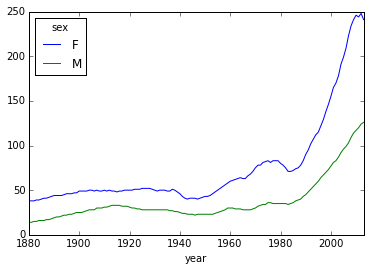

In [72]:
%matplotlib inline
diversity.plot()

### 마지막 글자의 변화

In [169]:
get_last_letter=lambda x:x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'

table=names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [170]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108397  691245  675901    977    5214   28814
b               NaN     694     454    411    3912   39208
c                 5      49     953    482   15466   23307
d              6751    3728    2635  22113  262143   44758
e            133601  435048  316288  28665  178810  130073

In [171]:
subtable.sum()

sex  year
F    1910     396501
     1960    2022093
     2010    1772738
M    1910     194218
     1960    2132717
     2010    1913851
dtype: float64

In [172]:
letter_prop=subtable/subtable.sum().astype(float)

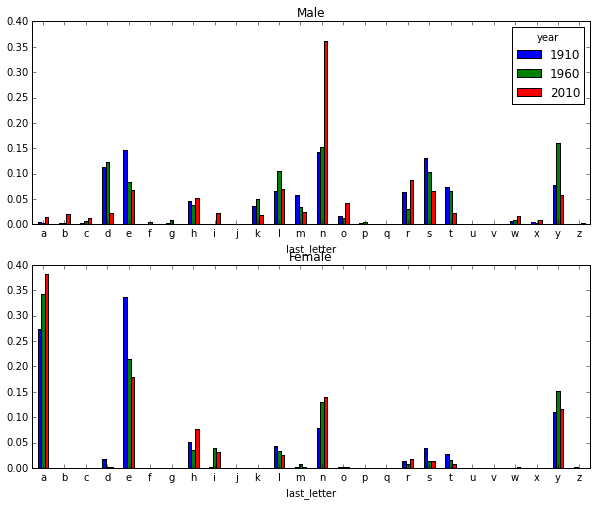

In [173]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male') 
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [174]:
letter_prop=table/table.sum().astype(float)
dny_ts=letter_prop.ix[['d','n','y'],'M'].T

dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


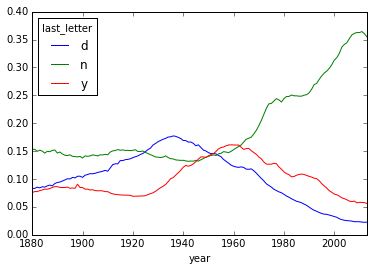

In [175]:
dny_ts.plot()

### 남자 이름과 여자 이름이 바뀐 경우

In [176]:
all_names=top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [180]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    374135
Lesly      11154
Name: births, dtype: int64

In [181]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
table=table.div(table.sum(1),axis=0)

In [183]:
table.tail()

sex,F,M
year,,
2009,1,NaN
2010,1,NaN
2011,1,NaN
2012,1,NaN
2013,1,NaN


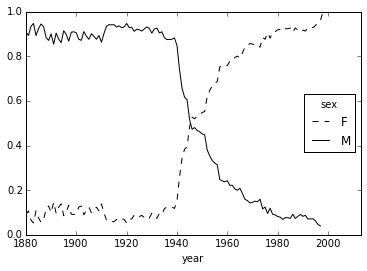

In [184]:
table.plot(style={'M':'k-','F':'k--'})

____________________________________

## 느낀점

#### 작년 스크립트 프로그래밍 들었던 것이 많이 도움 되었고 생각났다.
#### 문법과 과정, 분석 방법을 이해하기보단 우선 데이터를 분석하는 툴과 사용한 함수들에 대한 것을 살펴보는 것에 주력했다. 
#### 버전이 문제인지 윈도우라서 문제인지 한두개 에러를 찾지 못했다. 